In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\train_car.csv")

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train_data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [5]:
train_data['Vehicle_Age']=train_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 34.9+ MB


In [7]:
train_data.shape

(381109, 12)

In [8]:
np.sum(train_data.isnull())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Vehicle_Damage']=encoder.fit_transform(train_data['Vehicle_Damage'])

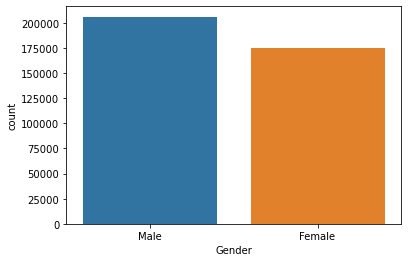

In [10]:
sns.countplot(data=train_data,x='Gender')

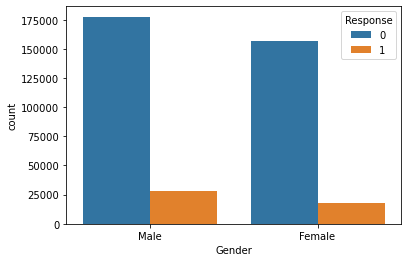

In [11]:
sns.countplot(data=train_data,x='Gender',hue='Response')

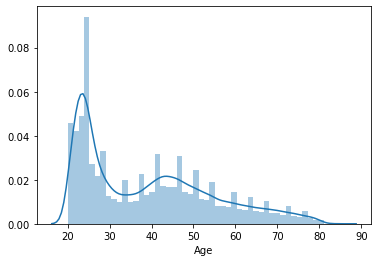

In [12]:
sns.distplot(train_data['Age'])

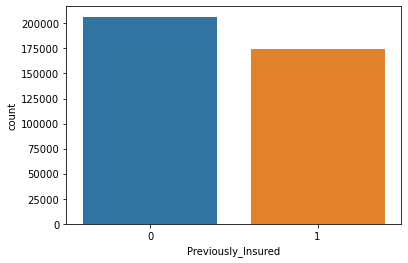

In [13]:
sns.countplot(data=train_data,x='Previously_Insured')

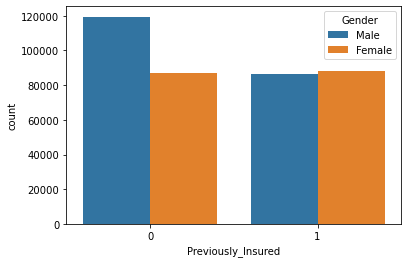

In [14]:
sns.countplot(data=train_data,x='Previously_Insured',hue='Gender')

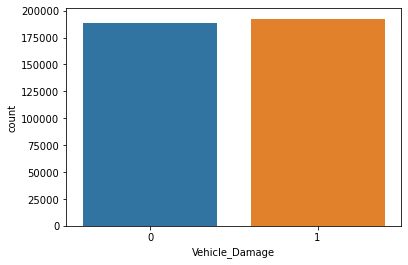

In [15]:
sns.countplot(data=train_data,x='Vehicle_Damage')

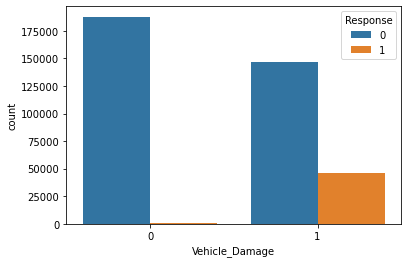

In [16]:
sns.countplot(data=train_data,x='Vehicle_Damage',hue='Response')

In [17]:
train_data['Vehicle_Age'].value_counts()

1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64

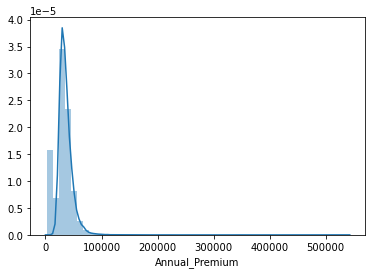

In [18]:
sns.distplot(train_data['Annual_Premium'],kde=True)

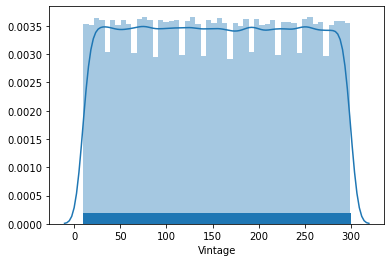

In [19]:
sns.distplot(train_data['Vintage'],rug=True)

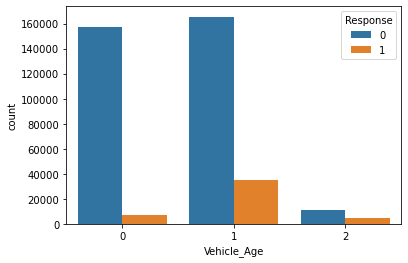

In [20]:
sns.countplot(data=train_data,x='Vehicle_Age',hue='Response')

In [21]:
import scipy.stats as stats

In [22]:
def diagnostic_plots(train_data,varables):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    train_data[varables].hist()
    plt.subplot(1,2,2)
    
    stats.probplot(train_data[varables],dist='norm',plot=plt)
    plt.show()

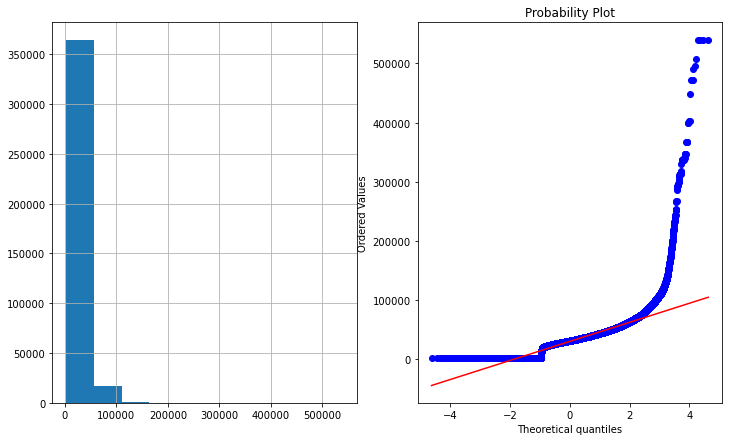

In [23]:
diagnostic_plots(train_data,'Annual_Premium')

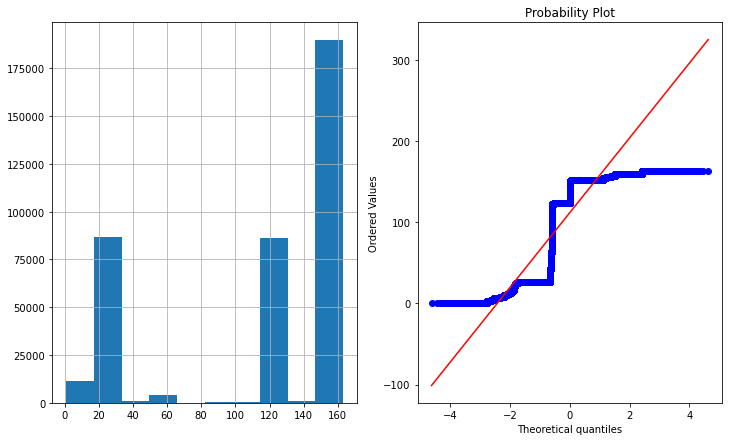

In [24]:
diagnostic_plots(train_data,'Policy_Sales_Channel')

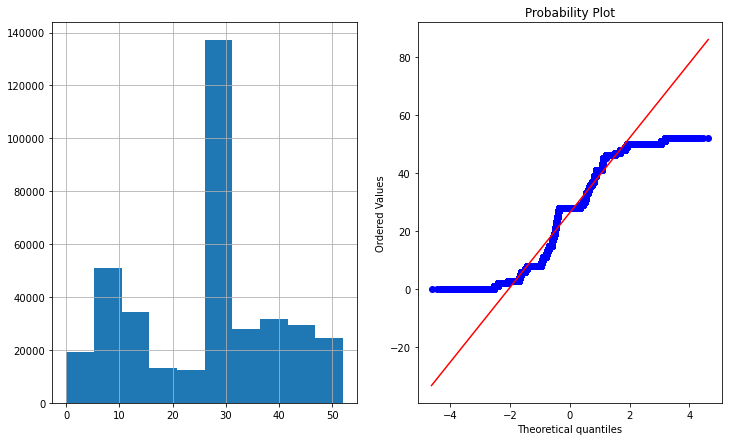

In [25]:
diagnostic_plots(train_data,'Region_Code')

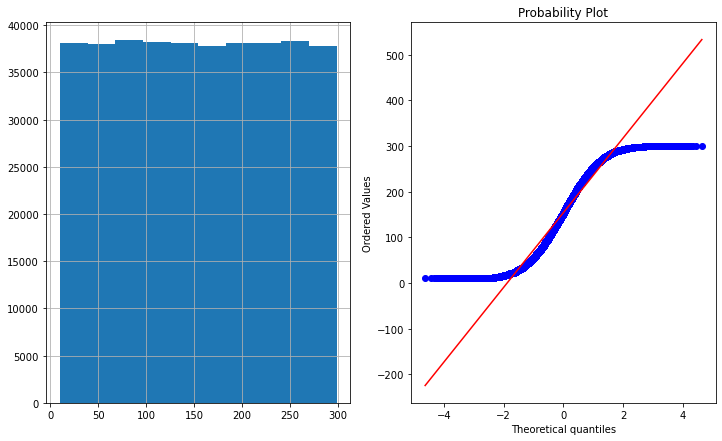

In [26]:
diagnostic_plots(train_data,'Vintage')

In [27]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,0,0,27496.0,152.0,39,0


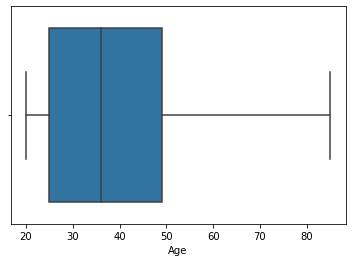

In [28]:
sns.boxplot(train_data['Age'])
#no outliers

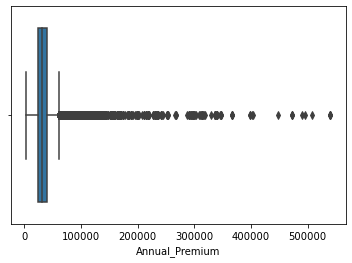

In [29]:
sns.boxplot(train_data['Annual_Premium'])
#having outliers

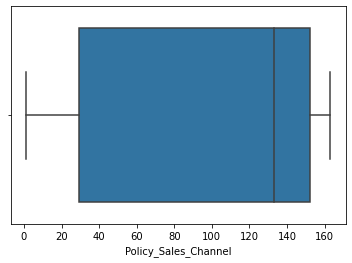

In [30]:
sns.boxplot(train_data['Policy_Sales_Channel'])
#no outliers

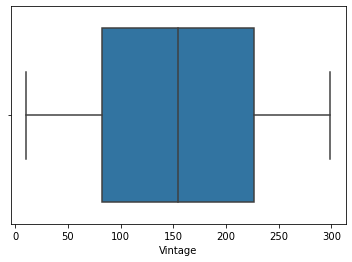

In [31]:
sns.boxplot(train_data['Vintage'])
#no outliers

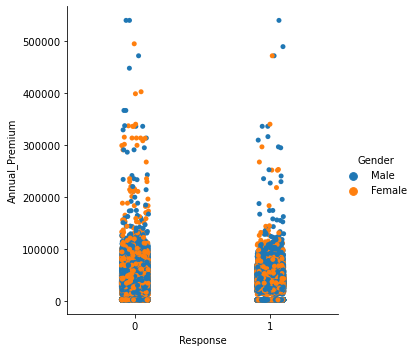

In [32]:
sns.catplot(x="Response", y='Annual_Premium',hue='Gender', data=train_data[train_data.Previously_Insured==0])

In [33]:
#Handling outliers using IQR
#Quadrant1-25
#quadrant3-75
Q1=np.percentile(train_data.Annual_Premium,25)
Q3=np.percentile(train_data.Annual_Premium,75)
#upperlimit-lowerlimit
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)


In [34]:
#never try to remove outliers beacuse some new values maybe eliminated for that replace those values
#winsorize is meathod to handle outliers
import scipy.stats
scipy.stats.mstats.winsorize(train_data['Annual_Premium'],limits=0.05,inplace=True)

masked_array(data=[40454., 33536., 38294., ..., 35118., 44617., 41777.],
             mask=False,
       fill_value=1e+20)

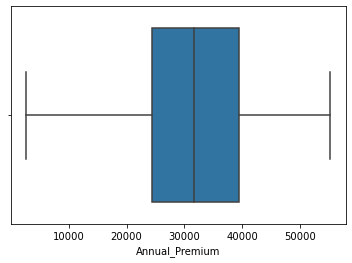

In [35]:
sns.boxplot(train_data['Annual_Premium'])
#outlier handled

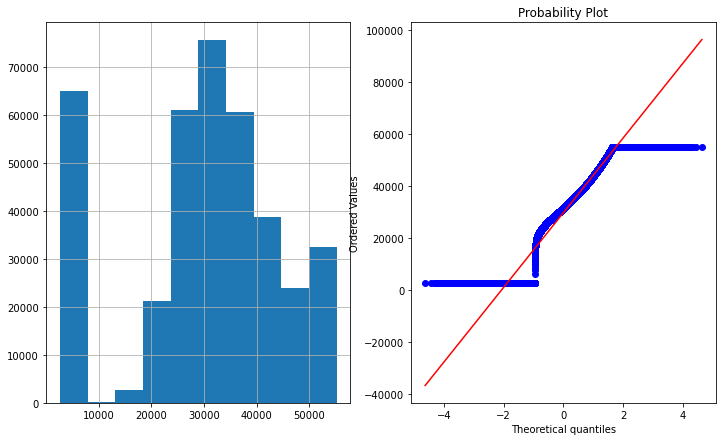

In [36]:
diagnostic_plots(train_data,'Annual_Premium')

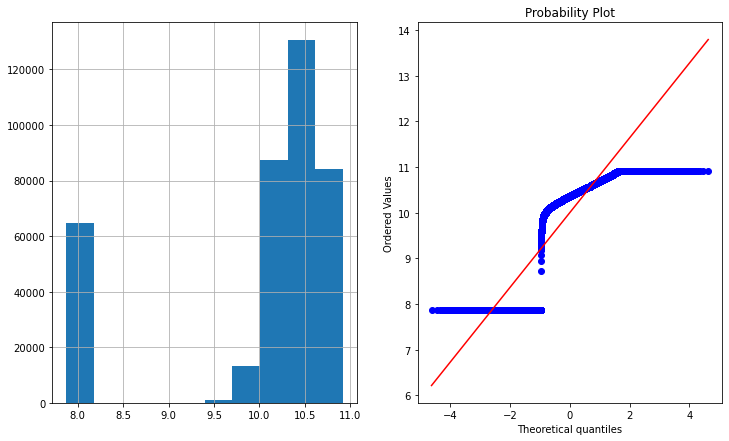

In [37]:
#Log transformation for Annual_Premium
# perform data transformation 
train_data['log_Annual_Premium']=np.log(train_data['Annual_Premium']+1)
diagnostic_plots(train_data,'log_Annual_Premium')

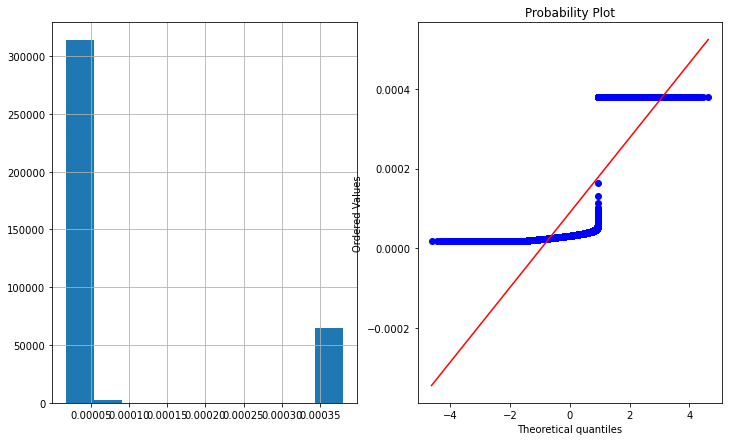

In [38]:
#Reciprocal transformation
train_data['rec_Annual_Premium']=1/(train_data['Annual_Premium']+1)
diagnostic_plots(train_data,'rec_Annual_Premium')

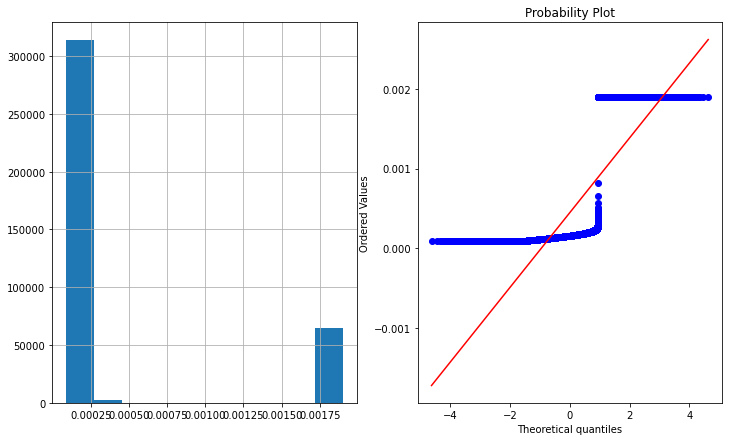

In [39]:
#expol transformation
train_data['exp_Annual_Premium']=1/(train_data['Annual_Premium']**1/5)
diagnostic_plots(train_data,'exp_Annual_Premium')

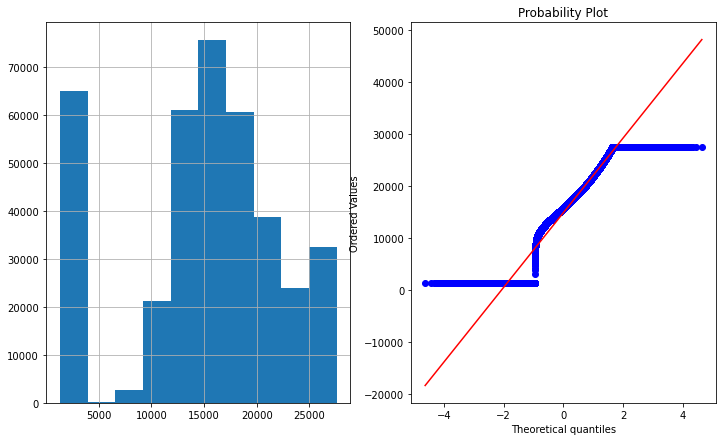

In [40]:
#sqrt transformation
#sqrt transformation is good compared to all transformation
train_data['sqrt_Annual_Premium']=train_data['Annual_Premium']**1/2
diagnostic_plots(train_data,'sqrt_Annual_Premium')

In [41]:
train_data.head()
#here we are having all types of transformation for Annual_ premium
#so drop all those things
#And drop original Annual_premium we don't  need that because we are having sqrt_Annual_Premium

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_Annual_Premium,rec_Annual_Premium,exp_Annual_Premium,sqrt_Annual_Premium
0,1,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1,10.607946,0.000025,0.000124,20227.0
1,2,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0,10.420405,0.000030,0.000149,16768.0
2,3,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1,10.553075,0.000026,0.000131,19147.0
3,4,Male,21,1,11.0,1,0,0,28619.0,152.0,203,0,10.261861,0.000035,0.000175,14309.5
4,5,Female,29,1,41.0,1,0,0,27496.0,152.0,39,0,10.221832,0.000036,0.000182,13748.0


In [42]:
train_data.drop(['log_Annual_Premium','rec_Annual_Premium','exp_Annual_Premium','Annual_Premium'],axis=1,inplace=True)

In [43]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,sqrt_Annual_Premium
0,1,Male,44,1,28.0,0,2,1,26.0,217,1,20227.0
1,2,Male,76,1,3.0,0,1,0,26.0,183,0,16768.0
2,3,Male,47,1,28.0,0,2,1,26.0,27,1,19147.0
3,4,Male,21,1,11.0,1,0,0,152.0,203,0,14309.5
4,5,Female,29,1,41.0,1,0,0,152.0,39,0,13748.0


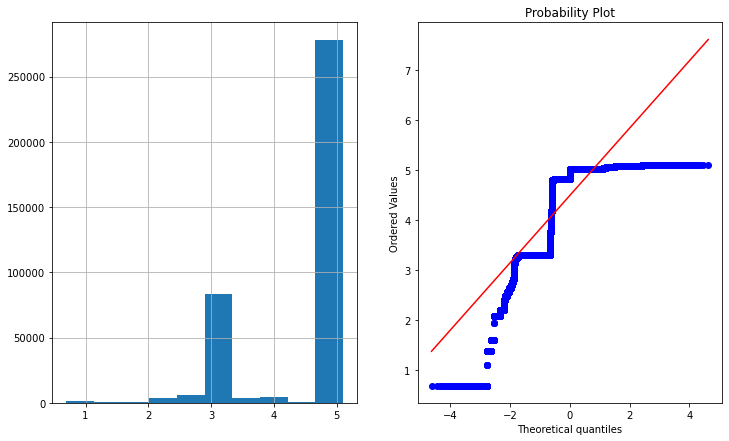

In [44]:
#Log transformation
train_data['log_Policy_sales']=np.log(train_data['Policy_Sales_Channel']+1)
diagnostic_plots(train_data,'log_Policy_sales')

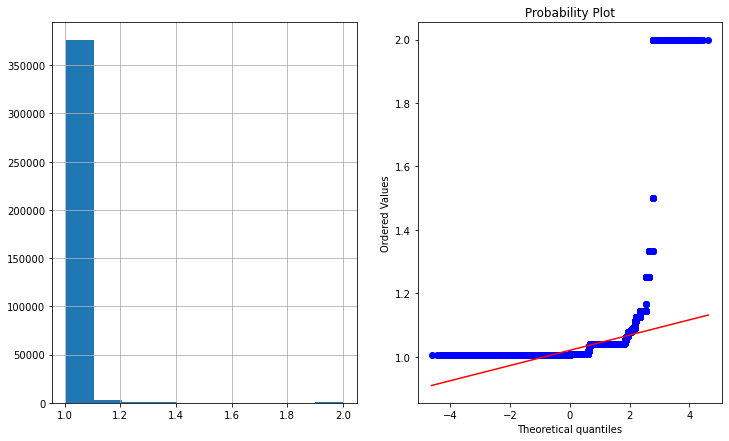

In [45]:
#\REC transformation
train_data['rec_Policy_sales']=1/train_data['Policy_Sales_Channel']+1
diagnostic_plots(train_data,'rec_Policy_sales')

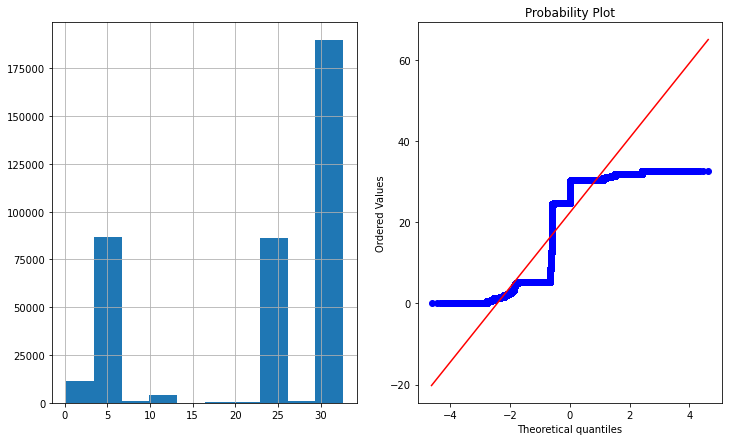

In [46]:
#expol transformation
train_data['exp_Policy_sales']=train_data['Policy_Sales_Channel']**1/5
diagnostic_plots(train_data,'exp_Policy_sales')

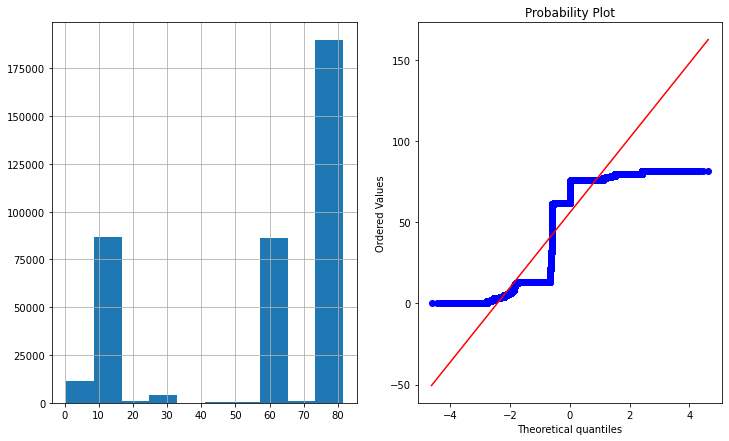

In [47]:
#sqrt transformation
#sqrt transformation is good compared to all transformation
train_data['sqrt_policy_sales']=train_data['Policy_Sales_Channel']**1/2
diagnostic_plots(train_data,'sqrt_policy_sales')

Optimal lambda:  1.452928632827038


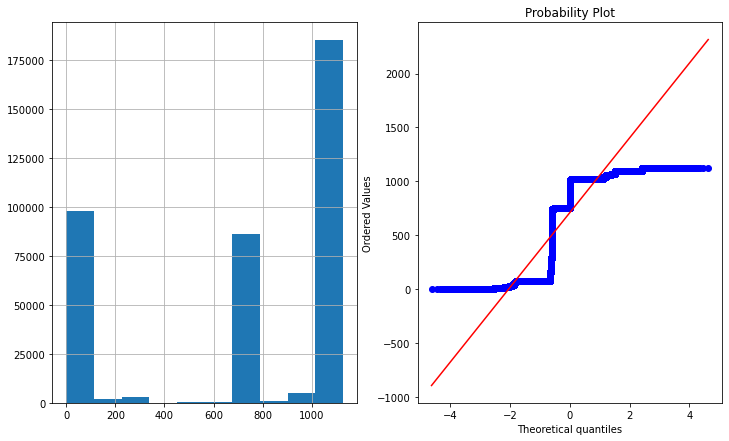

In [48]:
train_data['Fare_boxcox'], param = stats.boxcox(train_data.Policy_Sales_Channel+.1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(train_data, 'Fare_boxcox')

In [49]:
train_data.drop(['log_Policy_sales','exp_Policy_sales','sqrt_policy_sales','Fare_boxcox','Policy_Sales_Channel'],axis=1,inplace=True)

In [50]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,Response,sqrt_Annual_Premium,rec_Policy_sales
0,1,Male,44,1,28.0,0,2,1,217,1,20227.0,1.038462
1,2,Male,76,1,3.0,0,1,0,183,0,16768.0,1.038462
2,3,Male,47,1,28.0,0,2,1,27,1,19147.0,1.038462
3,4,Male,21,1,11.0,1,0,0,203,0,14309.5,1.006579
4,5,Female,29,1,41.0,1,0,0,39,0,13748.0,1.006579


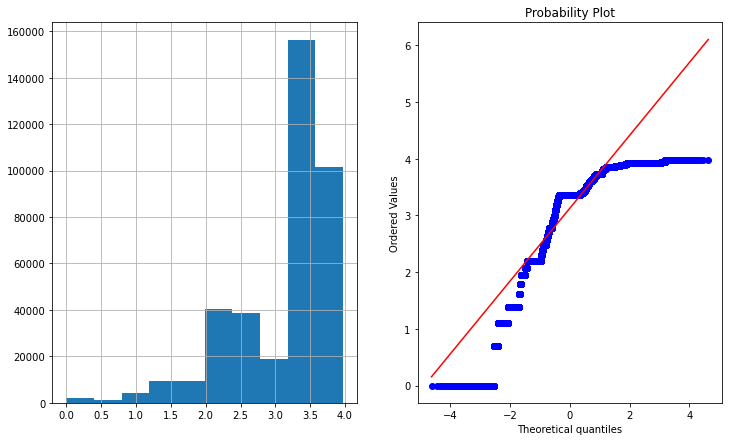

In [51]:
train_data['log_Region_Code']=np.log(train_data['Region_Code']+1)
diagnostic_plots(train_data,'log_Region_Code')

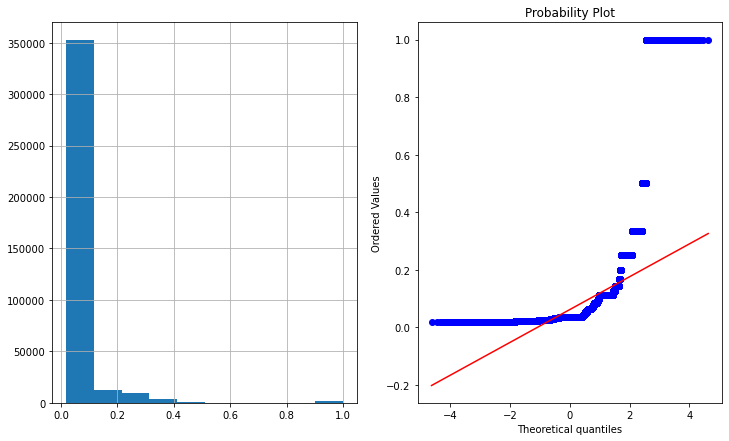

In [52]:
train_data['exp_Region_Code']=1/(train_data['Region_Code']+1)
diagnostic_plots(train_data,'exp_Region_Code')

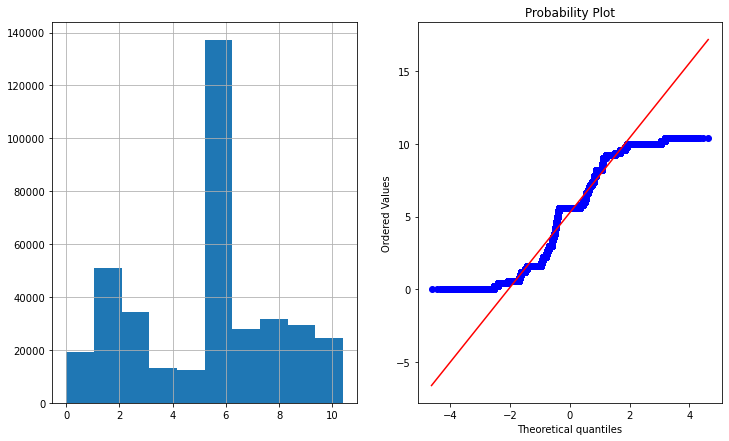

In [53]:
train_data['rec_Region_Code']=train_data['Region_Code']**1/5
diagnostic_plots(train_data,'rec_Region_Code')

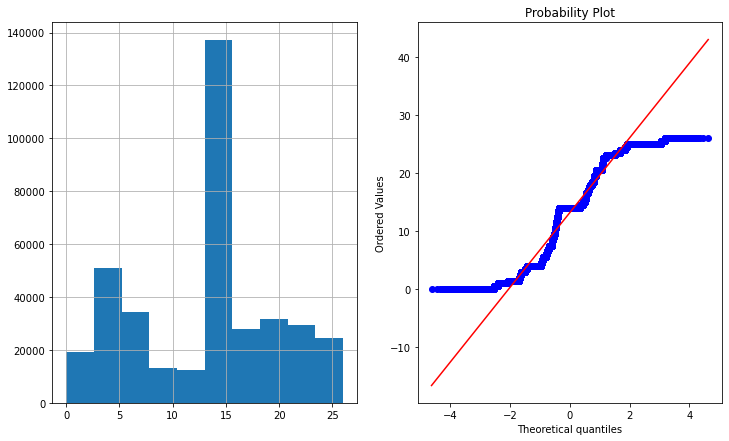

In [54]:
train_data['sqrt_Region_Code']=train_data['Region_Code']**1/2
diagnostic_plots(train_data,'sqrt_Region_Code')

In [55]:
train_data.drop(['log_Region_Code','exp_Region_Code','rec_Region_Code','Region_Code','Gender'],axis=1,inplace=True)

In [56]:
train_data.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,Response,sqrt_Annual_Premium,rec_Policy_sales,sqrt_Region_Code
0,1,44,1,0,2,1,217,1,20227.0,1.038462,14.0
1,2,76,1,0,1,0,183,0,16768.0,1.038462,1.5
2,3,47,1,0,2,1,27,1,19147.0,1.038462,14.0
3,4,21,1,1,0,0,203,0,14309.5,1.006579,5.5
4,5,29,1,1,0,0,39,0,13748.0,1.006579,20.5


In [57]:
features=train_data.drop(['Response'],axis=1).values
label=train_data['Response'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.4,random_state=12)

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
model.score(X_train,y_train)

0.877257122865327

In [61]:
model.score(X_test,y_test)

0.8777059116790428

In [62]:
y_pred=model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test,y_pred))

[[133801      0]
 [ 18643      0]]


In [65]:
print(accuracy_score(y_test,y_pred))

0.8777059116790428


In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label,model.predict(features))

In [67]:
cm

array([[334399,      0],
       [ 46710,      0]], dtype=int64)

In [68]:
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [69]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    334399
           1       0.00      0.00      0.00     46710

    accuracy                           0.88    381109
   macro avg       0.44      0.50      0.47    381109
weighted avg       0.77      0.88      0.82    381109



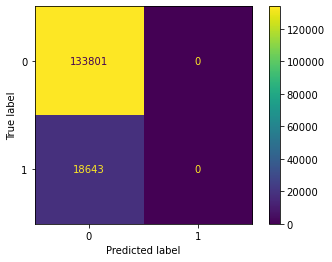

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [71]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [72]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(features,label)

In [73]:
X_res.shape,y_res.shape

((619634, 10), (619634,))

In [74]:
%%time
from collections import Counter
print('Original dataset shape {}'.format(Counter(label)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({0: 309817, 1: 309817})
Wall time: 303 ms


In [75]:
%%time
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res,y_res)

Wall time: 4min 14s


RandomForestClassifier()

In [76]:
classifier.score(X_train,y_train)

0.9916821551177487

In [77]:
y_res=classifier.predict(X_test)

In [78]:
print(confusion_matrix(y_test,y_res))
print(accuracy_score(y_test,y_res))

[[133015    786]
 [   565  18078]]
0.9911377292645168


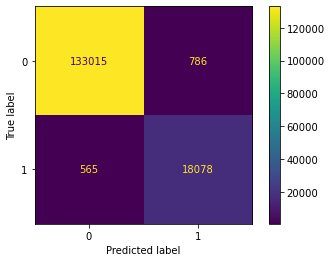

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,X_test,y_test)
plt.show()

# ==============

0.9975755733390486


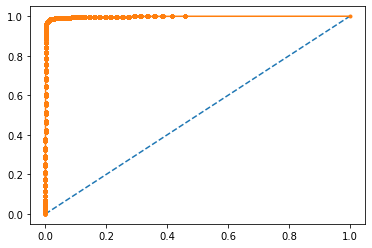

In [80]:
#For Logisticc Regression Model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#When it comes to plotting curve, we need the probabilities for positive outcome

#Calc Probabilities
proba = classifier.predict_proba(features)

#Keep Probabilities of Positive Outcome
proba = proba[:,1]

# Calc AUC
auc = roc_auc_score(label,proba)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(label,proba)

#Plot No Skill
#No skill (0,0) , Full Skill (1,1)

plt.plot([0,1],[0,1], linestyle = '--')

#plot ROC curve
plt.plot(fpr,tpr, marker='.')

In [83]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 500, 
                         depth= 9, border_count= 20,eval_metric = 'AUC')

In [85]:
cat= cat.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

0:	test: 0.8377117	best: 0.8377117 (0)	total: 255ms	remaining: 2m 7s
50:	test: 0.8530507	best: 0.8530507 (50)	total: 5.13s	remaining: 45.2s
100:	test: 0.8550616	best: 0.8550616 (100)	total: 10.5s	remaining: 41.5s
150:	test: 0.8557766	best: 0.8557766 (150)	total: 15.7s	remaining: 36.3s
200:	test: 0.8562251	best: 0.8562251 (200)	total: 20.5s	remaining: 30.5s
250:	test: 0.8564356	best: 0.8564356 (250)	total: 25.2s	remaining: 25s
300:	test: 0.8565947	best: 0.8565953 (299)	total: 30s	remaining: 19.8s
350:	test: 0.8565669	best: 0.8566219 (305)	total: 35s	remaining: 14.9s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.8566218553
bestIteration = 305

Shrink model to first 306 iterations.


In [90]:
pred_proba_cat = cat.predict_proba(features)


In [124]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,early_stopping_rounds= 50)


pred_proba = lgb.predict_proba(features)
#print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_test, pred_proba)))

[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.857022
[100]	valid_0's auc: 0.858008
[150]	valid_0's auc: 0.858217
[200]	valid_0's auc: 0.858305
[250]	valid_0's auc: 0.858293
Early stopping, best iteration is:
[206]	valid_0's auc: 0.858328


In [95]:
test_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\test_insuriance.csv")

In [96]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [98]:
np.sum(test_data.isnull())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [99]:
test_data['Vehicle_Damage']=encoder.fit_transform(test_data['Vehicle_Damage'])

In [100]:
test_data['Vehicle_Age']=test_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [101]:
def dist_plot(test_data,variab):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    test_data[variab].hist()
    plt.subplot(1,2,2)
    stats.probplot(test_data[variab],dist='norm',plot=plt)
    plt.show()

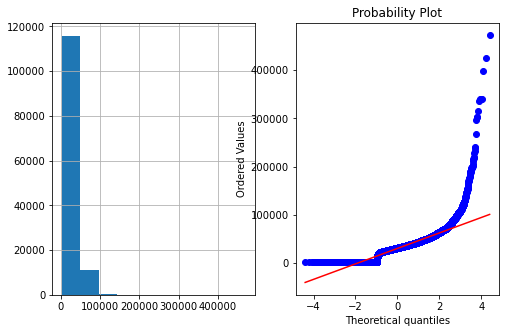

In [102]:
dist_plot(test_data,'Annual_Premium')

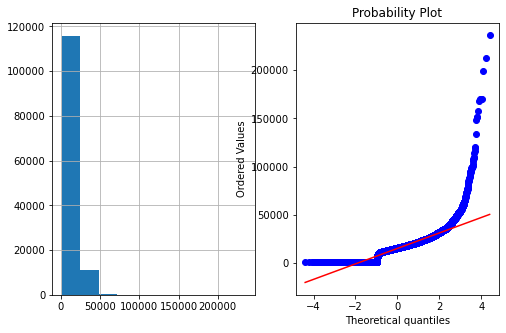

In [103]:
#sqrt Annual_premium
test_data['sqrt_Annual_Premium']=test_data['Annual_Premium']**1/2
dist_plot(test_data,'sqrt_Annual_Premium')

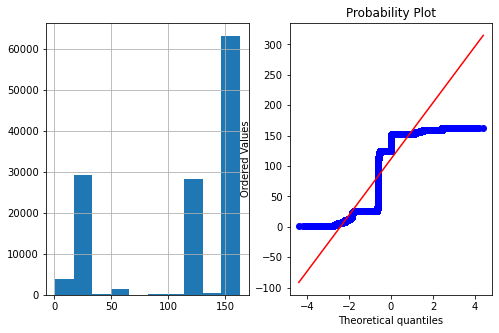

In [104]:
dist_plot(test_data,'Policy_Sales_Channel')

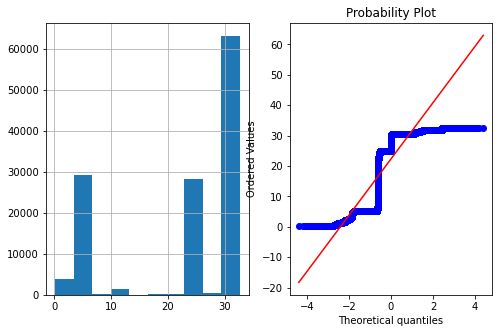

In [105]:
test_data['exp_Policy_Sales_Channel']=test_data['Policy_Sales_Channel']**1/5
dist_plot(test_data,'exp_Policy_Sales_Channel')

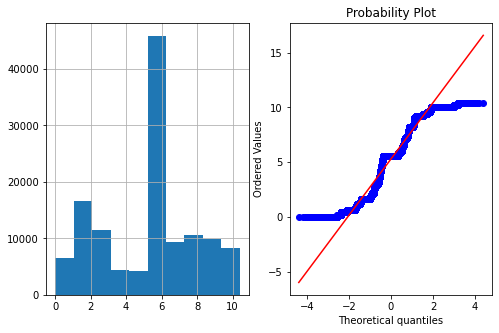

In [106]:
test_data['exp_Region_Code']=test_data['Region_Code']**1/5
dist_plot(test_data,'exp_Region_Code')

In [107]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,sqrt_Annual_Premium,exp_Policy_Sales_Channel,exp_Region_Code
0,381110,Male,25,1,11.0,1,0,0,35786.0,152.0,53,17893.0,30.4,2.2
1,381111,Male,40,1,28.0,0,1,1,33762.0,7.0,111,16881.0,1.4,5.6
2,381112,Male,47,1,28.0,0,1,1,40050.0,124.0,199,20025.0,24.8,5.6
3,381113,Male,24,1,27.0,1,0,1,37356.0,152.0,187,18678.0,30.4,5.4
4,381114,Male,27,1,28.0,1,0,0,59097.0,152.0,297,29548.5,30.4,5.6


In [ ]:
41.00

In [108]:
test_data.drop(['Region_Code','Annual_Premium','Policy_Sales_Channel','Gender'],axis=1,inplace=True)

In [109]:
test_data.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,sqrt_Annual_Premium,exp_Policy_Sales_Channel,exp_Region_Code
0,381110,25,1,1,0,0,53,17893.0,30.4,2.2
1,381111,40,1,0,1,1,111,16881.0,1.4,5.6
2,381112,47,1,0,1,1,199,20025.0,24.8,5.6
3,381113,24,1,1,0,1,187,18678.0,30.4,5.4
4,381114,27,1,1,0,0,297,29548.5,30.4,5.6


In [110]:
train_data.shape,test_data.shape

((381109, 11), (127037, 10))

In [111]:
#Handling outliers using IQR
#Quadrant1-25
#quadrant3-75
Q1=np.percentile(test_data.sqrt_Annual_Premium,25)
Q3=np.percentile(test_data.sqrt_Annual_Premium,75)
#upperlimit-lowerlimit
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)


In [112]:
#never try to remove outliers beacuse some new values maybe eliminated for that replace those values
#winsorize is meathod to handle outliers
import scipy.stats
scipy.stats.mstats.winsorize(test_data['sqrt_Annual_Premium'],limits=0.05,inplace=True)

masked_array(data=[17893. , 16881. , 20025. , ..., 14901. , 27611. ,
                   13963.5],
             mask=False,
       fill_value=1e+20)

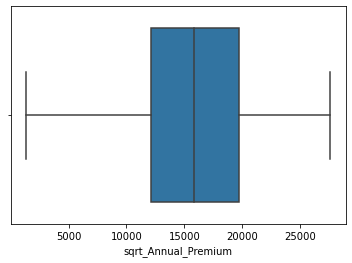

In [113]:
sns.boxplot(test_data['sqrt_Annual_Premium'])
#having outliers

In [114]:
test_data.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,sqrt_Annual_Premium,exp_Policy_Sales_Channel,exp_Region_Code
0,381110,25,1,1,0,0,53,17893.0,30.4,2.2
1,381111,40,1,0,1,1,111,16881.0,1.4,5.6
2,381112,47,1,0,1,1,199,20025.0,24.8,5.6
3,381113,24,1,1,0,1,187,18678.0,30.4,5.4
4,381114,27,1,1,0,0,297,27611.0,30.4,5.6


In [115]:
train_data.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,Response,sqrt_Annual_Premium,rec_Policy_sales,sqrt_Region_Code
0,1,44,1,0,2,1,217,1,20227.0,1.038462,14.0
1,2,76,1,0,1,0,183,0,16768.0,1.038462,1.5
2,3,47,1,0,2,1,27,1,19147.0,1.038462,14.0
3,4,21,1,1,0,0,203,0,14309.5,1.006579,5.5
4,5,29,1,1,0,0,39,0,13748.0,1.006579,20.5


In [116]:
x=test_data

In [117]:
test_data['Response']=cat.predict(x)

In [118]:
test_data.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,sqrt_Annual_Premium,exp_Policy_Sales_Channel,exp_Region_Code,Response
0,381110,25,1,1,0,0,53,17893.0,30.4,2.2,0
1,381111,40,1,0,1,1,111,16881.0,1.4,5.6,0
2,381112,47,1,0,1,1,199,20025.0,24.8,5.6,0
3,381113,24,1,1,0,1,187,18678.0,30.4,5.4,0
4,381114,27,1,1,0,0,297,27611.0,30.4,5.6,0


In [119]:
result=test_data[['id','Response']]

In [120]:
result.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [121]:
result.to_csv("car_cat.csv",index=0)

In [ ]:
...